In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as pdr
import yfinance as yf

In [49]:
stock_symbol = "AAPL"
start_date = "2010-01-01"
end_date = "2019-12-31"

data = yf.download(stock_symbol, start=start_date, end=end_date)

[*********************100%%**********************]  1 of 1 completed


In [50]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.487533,493729600
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.498751,601904800
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.395378,552160000
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.383556,477131200
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.425996,447610800


In [51]:
data.shape

(2515, 6)

In [52]:
data.reset_index()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,7.622500,7.660714,7.585000,7.643214,6.487533,493729600
1,2010-01-05,7.664286,7.699643,7.616071,7.656429,6.498751,601904800
2,2010-01-06,7.656429,7.686786,7.526786,7.534643,6.395378,552160000
3,2010-01-07,7.562500,7.571429,7.466071,7.520714,6.383556,477131200
4,2010-01-08,7.510714,7.571429,7.466429,7.570714,6.425996,447610800
...,...,...,...,...,...,...,...
2510,2019-12-23,70.132500,71.062500,70.092499,71.000000,69.261604,98572000
2511,2019-12-24,71.172501,71.222504,70.730003,71.067497,69.327438,48478800
2512,2019-12-26,71.205002,72.495003,71.175003,72.477501,70.702927,93121200
2513,2019-12-27,72.779999,73.492500,72.029999,72.449997,70.676102,146266000


In [53]:
df = data.reset_index()

In [54]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,7.622500,7.660714,7.585000,7.643214,6.487533,493729600
1,2010-01-05,7.664286,7.699643,7.616071,7.656429,6.498751,601904800
2,2010-01-06,7.656429,7.686786,7.526786,7.534643,6.395378,552160000
3,2010-01-07,7.562500,7.571429,7.466071,7.520714,6.383556,477131200
4,2010-01-08,7.510714,7.571429,7.466429,7.570714,6.425996,447610800


In [55]:
df = df.drop(["Date", "Adj Close"], axis=1)

In [56]:
df.head()

,Open,High,Low,Close,Volume
0,7.622500,7.660714,7.585000,7.643214,493729600
1,7.664286,7.699643,7.616071,7.656429,601904800
2,7.656429,7.686786,7.526786,7.534643,552160000
3,7.562500,7.571429,7.466071,7.520714,477131200
4,7.510714,7.571429,7.466429,7.570714,447610800


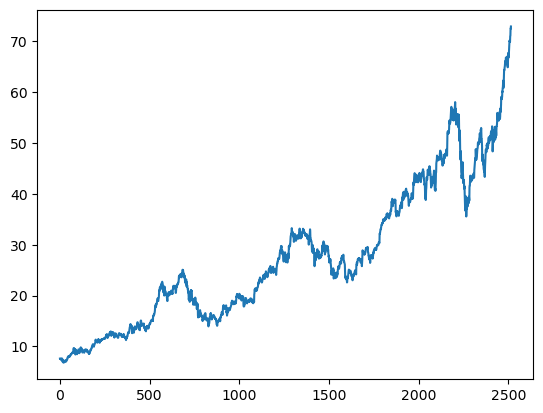

In [57]:
plt.plot(df.Close)

In [58]:
ma100 = df.Close.rolling(100).mean()
ma100

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2510    59.201075
2511    59.401700
2512    59.643125
2513    59.875125
2514    60.106325
Name: Close, Length: 2515, dtype: float64

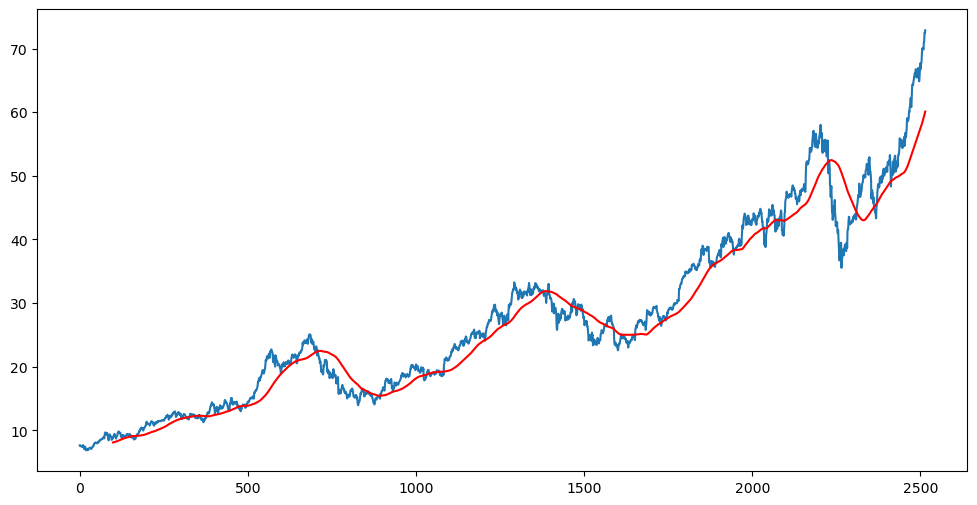

In [59]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')

In [60]:
ma200 = df.Close.rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2510    54.132313
2511    54.261513
2512    54.396763
2513    54.529350
2514    54.661100
Name: Close, Length: 2515, dtype: float64

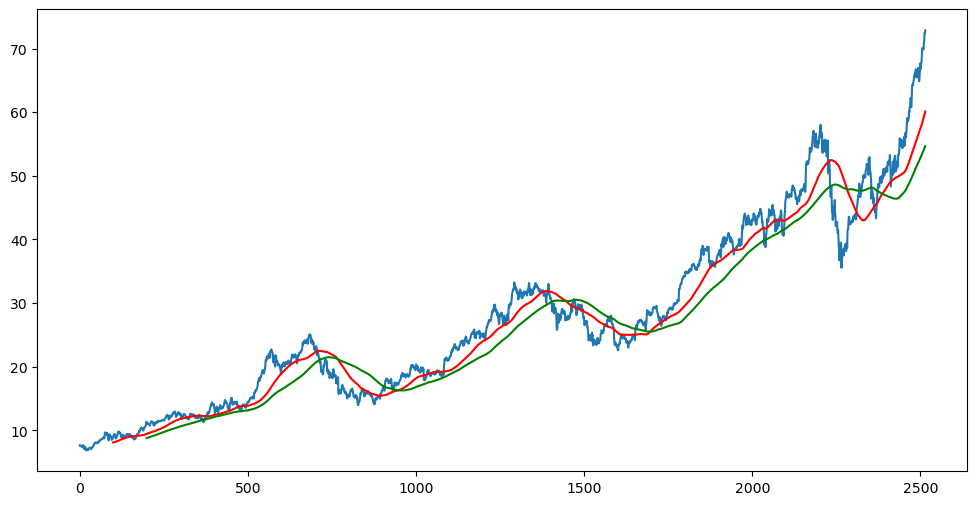

In [61]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')

In [62]:
df.shape

(2515, 5)

In [63]:
data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])
print(data_training.shape)
print(data_testing.shape)

(1760, 1)
(755, 1)


In [64]:
from sklearn.preprocessing import MinMaxScaler

In [65]:
scaler = MinMaxScaler(feature_range=(0,1))

In [66]:
data_training_array = scaler.fit_transform(data_training)

In [67]:
data_training_array

array([[0.02971782],
       [0.03021854],
       [0.02560389],
       ...,
       [0.84388656],
       [0.85089656],
       [0.84616011]])

In [68]:
x_train = []
y_train = []
data_training_array.shape

(1760, 1)

In [69]:
for i in range(100,data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i,0])
    

In [70]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [71]:
x_train.shape

(1660, 100, 1)

In [72]:
y_train.shape

(1660,)

In [73]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [74]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [75]:
model = Sequential()
model.add(LSTM(units=50, activation='relu', return_sequences=True,
               input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units=60, activation='relu', return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80, activation='relu', return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=50, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))


In [76]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 100, 50)           10400     
                                                                 
 dropout_4 (Dropout)         (None, 100, 50)           0         
                                                                 
 lstm_5 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_5 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_6 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_6 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_7 (LSTM)               (None, 50)               

In [77]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [78]:
model.fit(x_train, y_train, epochs=50)

Epoch 1/50
52/52 [==============================] - 13s 139ms/step - loss: 0.0852
Epoch 2/50
52/52 [==============================] - 7s 138ms/step - loss: 0.0218
Epoch 3/50
52/52 [==============================] - 7s 137ms/step - loss: 0.0179
Epoch 4/50
52/52 [==============================] - 7s 140ms/step - loss: 0.0158
Epoch 5/50
52/52 [==============================] - 7s 136ms/step - loss: 0.0144
Epoch 6/50
52/52 [==============================] - 7s 136ms/step - loss: 0.0134
Epoch 7/50
52/52 [==============================] - 7s 136ms/step - loss: 0.0141
Epoch 8/50
52/52 [==============================] - 7s 136ms/step - loss: 0.0124
Epoch 9/50
52/52 [==============================] - 7s 136ms/step - loss: 0.0123
Epoch 10/50
52/52 [==============================] - 7s 135ms/step - loss: 0.0114
Epoch 11/50
52/52 [==============================] - 7s 136ms/step - loss: 0.0106
Epoch 12/50
52/52 [==============================] - 7s 135ms/step - loss: 0.0110
Epoch 13/50
52/52 [=====

In [79]:
model.save('stock_prediction_model.h5')

In [80]:
data_testing

,Close
1760,29.182501
1761,28.955000
1762,29.037500
1763,29.004999
1764,29.152500
...,...
2510,71.000000
2511,71.067497
2512,72.477501
2513,72.449997


In [81]:
past_100_days = data_training.tail(100)

In [82]:
final_df = past_100_days.append(data_testing, ignore_index=True)

C:\Users\Husain Raza\AppData\Local\Temp\ipykernel_6744\531349220.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = past_100_days.append(data_testing, ignore_index=True)


In [83]:
final_df.shape

(855, 1)

In [84]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.02781467],
       [0.03015022],
       [0.02585064],
       [0.02547908],
       [0.02680611],
       [0.03370671],
       [0.03317586],
       [0.03232658],
       [0.03158344],
       [0.03306972],
       [0.02855781],
       [0.03036255],
       [0.02600988],
       [0.02356814],
       [0.02022403],
       [0.01958704],
       [0.01523437],
       [0.01576518],
       [0.01910933],
       [0.02441747],
       [0.02425819],
       [0.02776158],
       [0.01268645],
       [0.        ],
       [0.01226183],
       [0.02558522],
       [0.04586231],
       [0.06603324],
       [0.06258295],
       [0.05547006],
       [0.05541697],
       [0.05531082],
       [0.06099053],
       [0.05085197],
       [0.05175434],
       [0.05286905],
       [0.05743405],
       [0.04803866],
       [0.05265676],
       [0.04984341],
       [0.05239133],
       [0.05265676],
       [0.05711557],
       [0.05801795],
       [0.06858117],
       [0.0699082 ],
       [0.07542863],
       [0.073

In [85]:
input_data.shape

(855, 1)

In [86]:
x_test = []
y_test = []

for i in range(100,input_data.shape[0]):
    x_test.append(input_data[i-100: i])
    y_test.append(input_data[i,0])
    

In [87]:
x_test, y_test = np.array(x_test), np.array(y_test)

In [88]:
print(x_test.shape)
print(y_test.shape)

(755, 100, 1)
(755,)


In [89]:
y_predicted = model.predict(x_test)

24/24 [==============================] - 2s 48ms/step


In [90]:
y_predicted.shape

(755, 1)

In [91]:
y_predicted

array([[0.07332623],
       [0.07485887],
       [0.07628337],
       [0.07756808],
       [0.07869208],
       [0.07965165],
       [0.08047339],
       [0.08121425],
       [0.08193612],
       [0.08269879],
       [0.08353633],
       [0.08445331],
       [0.08545035],
       [0.08652076],
       [0.08764574],
       [0.08880299],
       [0.08996961],
       [0.0911217 ],
       [0.09226793],
       [0.0934307 ],
       [0.09462789],
       [0.09586066],
       [0.09711197],
       [0.09850487],
       [0.10020161],
       [0.10232174],
       [0.10492462],
       [0.10802013],
       [0.11156988],
       [0.115495  ],
       [0.11968374],
       [0.12402844],
       [0.12845409],
       [0.13290396],
       [0.13731992],
       [0.14164859],
       [0.14585945],
       [0.14993182],
       [0.1538324 ],
       [0.15752625],
       [0.16098759],
       [0.16419908],
       [0.16720843],
       [0.17005414],
       [0.1727753 ],
       [0.17538792],
       [0.17789471],
       [0.180

In [92]:
y_test

array([0.0721907 , 0.06736028, 0.06911197, 0.06842189, 0.07155371,
       0.07845431, 0.08418707, 0.08482406, 0.08822126, 0.08556719,
       0.08445249, 0.0895483 , 0.0894952 , 0.0883805 , 0.0895483 ,
       0.08997296, 0.08938906, 0.09952758, 0.0998461 , 0.09989915,
       0.09820055, 0.09671427, 0.1359945 , 0.1348267 , 0.1377462 ,
       0.144169  , 0.15075112, 0.15345824, 0.15547536, 0.1538829 ,
       0.16009341, 0.16927655, 0.17187748, 0.17102824, 0.17299223,
       0.17819418, 0.18037053, 0.1772918 , 0.17798189, 0.17941503,
       0.17973358, 0.1945963 , 0.19019062, 0.19454325, 0.19220766,
       0.19316316, 0.19040291, 0.18870427, 0.19114605, 0.19146452,
       0.19034986, 0.19815283, 0.19937368, 0.195658  , 0.20346096,
       0.19486173, 0.20324859, 0.20059453, 0.19910825, 0.20038224,
       0.21588199, 0.21758055, 0.21657199, 0.21513885, 0.21535114,
       0.22103089, 0.21704978, 0.21513885, 0.21344021, 0.21253783,
       0.20436334, 0.20526571, 0.20128461, 0.20542495, 0.20208

In [93]:
scaler.scale_

array([0.02123255])

In [94]:
scale_factor = 1/0.02123255

In [95]:
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

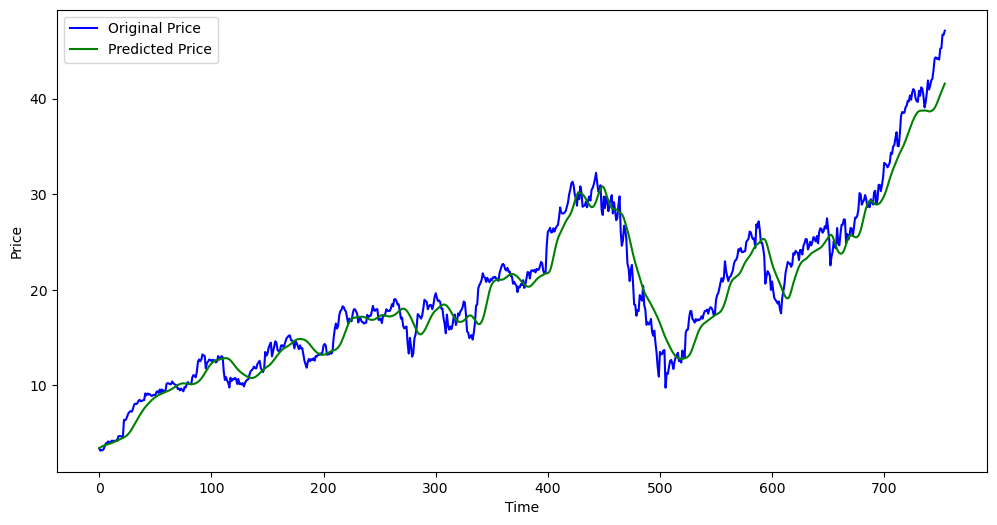

In [96]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b', label='Original Price')
plt.plot(y_predicted, 'g', label= 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()